In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from collections import Counter

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
credit_df = pd.read_csv(
    Path("/Users/sabrinafernandez/Desktop/module20/Resources/lending_data.csv")
)

# Review the DataFrame
# YOUR CODE HERE!
credit_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features
# Separate the y variable, the labels
# YOUR CODE HERE!]
# We set loan status as y because that's the data we're interested in

y = credit_df['loan_status']

# Separate the X variable, the features
# YOUR CODE HERE!
# we drop the same column from x because that's what we're interested in

X = credit_df.drop('loan_status', axis=1)

In [5]:
# Review the y variable Series
# YOUR CODE HERE!
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [6]:
# Review the X variable DataFrame
# YOUR CODE HERE!
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
# YOUR CODE HERE!
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

model = LogisticRegression(random_state=1)

# Fit the model using training data
# YOUR CODE HERE!

model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data
# YOUR CODE HERE!
# why do we use x_test for prediction? Because that is the data we need to TEST the trained model we just made
# in order to make a y prediction. Then, using the y prediction, we pair it with the y_test that's left
# and we use them to measure the accuracy.
# JUST REMEMBER: always use x to test, in order to create a prediction for y!!!
y_pred = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [11]:
# Print the balanced_accuracy score of the model
# YOUR CODE HERE!
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
balanced_accuracy

0.9520479254722232

In [12]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
confusion_matrix(y_pred,y_test)

array([[18663,    56],
       [  102,   563]])

In [13]:
# Print the classification report for the model
# YOUR CODE HERE!
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18719
           1       0.91      0.85      0.88       665

    accuracy                           0.99     19384
   macro avg       0.95      0.92      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** This model predicts healthy loans 99% of the time, but only predicts high risk loans 91% of the time.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [28]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# Increases the size of the dataset (to give your model more data to train)
# YOUR CODE HERE!
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
# Behind the scenes: they take your original x and y train and then they PURIFY it to better data,
# that's why the accuracy ends up being higher
X_train_two, y_train_two = ros.fit_resample(X_train, y_train)

In [33]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!
Counter(y_train_two)

Counter({0: 56271, 1: 56271})

In [34]:
y_train_two.value_counts()

1    56271
0    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [18]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
logistic = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
# YOUR CODE HERE!
model_two = logistic.fit(X_train_two, y_train_two)

# Make a prediction using the testing data
# YOUR CODE HERE!
prediction = model_two.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [20]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!
balanced_accuracy_two = balanced_accuracy_score(y_test, prediction)
balanced_accuracy_two

0.9936781215845847

In [21]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
confusion_matrix(prediction, y_test)

array([[18649,     4],
       [  116,   615]])

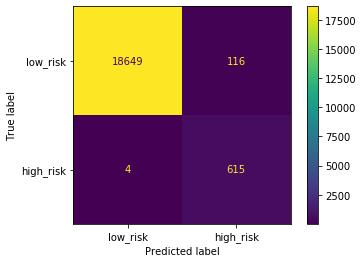

In [24]:
import numpy as np ; 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay; 

class_names = ["low_risk", "high_risk"]

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, prediction), display_labels= class_names) ;  
disp.plot()

In [22]:
# Print the classification report for the model
# YOUR CODE HERE!
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18653
           1       0.99      0.84      0.91       731

    accuracy                           0.99     19384
   macro avg       0.99      0.92      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** This model is a lot better. It's able to predict healthy loans the same as the previous model at 99% AND its able to predict the high risk loans also at 99% versus the 91% on the previous model.